In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data=pd.read_csv(mouse_drug_data_to_load)
clinical_trial=pd.read_csv(clinical_trial_data_to_load )

# Combine the data into a single dataset

merge_data = pd.merge(mouse_drug_data, clinical_trial, on="Mouse ID", how="outer")


# Display the data table for preview
merge_data.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumor_volume =merge_data.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].mean()
# Convert to DataFrame
mean_tumor_volume_df = pd.DataFrame(mean_tumor_volume).reset_index()
# Preview DataFrame
mean_tumor_volume_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
sem_data = merge_data.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].sem()

# Convert to DataFrame

sem_data = pd.DataFrame(sem_data).reset_index()

# Preview DataFrame
sem_data.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
reformat_mean_df= mean_tumor_volume_df.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
# Preview that Reformatting worked
reformat_mean_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


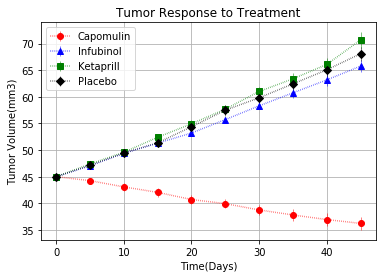

In [5]:
# Generate the Plot (with Error Bars)
x_axis=reformat_mean_df.index.values
err_capomulin_volume = sem_data.loc[sem_data['Drug'] == 'Capomulin']['Tumor Volume (mm3)'].values
err_infubinol_volume = sem_data.loc[sem_data['Drug'] == 'Infubinol']['Tumor Volume (mm3)'].values
err_ketapril_volume = sem_data.loc[sem_data['Drug'] == 'Ketapril']['Tumor Volume (mm3)'].values
err_placebo_volume = sem_data.loc[sem_data['Drug'] == 'Placebo']['Tumor Volume (mm3)'].values

plt.errorbar(x_axis,reformat_mean_df['Capomulin'],yerr=err_capomulin_volume,fmt="or",dashes=[0.3,1],elinewidth=0.5,label='Capomulin')
plt.errorbar(x_axis,reformat_mean_df['Infubinol'],yerr=err_infubinol_volume,fmt="b^",dashes=[0.3,1],elinewidth=0.5,label='Infubinol')
plt.errorbar(x_axis,reformat_mean_df['Ketapril'],yerr=err_ketapril_volume,fmt="gs",dashes=[0.3,1],elinewidth=0.5,label='Ketaprill')
plt.errorbar(x_axis,reformat_mean_df['Placebo'],yerr=err_placebo_volume,fmt="kD",dashes=[0.3,1],elinewidth=0.5,label='Placebo')

plt.xlabel("Time(Days)")
plt.ylabel("Tumor Volume(mm3)")
plt.title("Tumor Response to Treatment")

plt.grid()
plt.legend()
# Show the Figure
#plt.show()
# Save the Figure
plt.savefig('Tumor Response to Treatment.png')
plt.show()

## Metastatic Response to Treatment

In [6]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_metsite =merge_data.groupby(["Drug","Timepoint"])["Metastatic Sites"].mean()
# Convert to DataFrame
mean_metsite_df = pd.DataFrame(mean_metsite).reset_index()
# Preview DataFrame
mean_metsite_df.head()



,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [7]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
sem_metsite =merge_data.groupby(["Drug","Timepoint"])["Metastatic Sites"].sem()
# Convert to DataFrame
sem_metsite_df = pd.DataFrame(sem_metsite).reset_index()
# Preview DataFrame
sem_metsite_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [8]:
# Minor Data Munging to Re-Format the Data Frames
reformat_metsite_mean= mean_metsite_df.pivot(index='Timepoint', columns='Drug', values="Metastatic Sites")

# Preview that Reformatting worked
reformat_metsite_mean.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


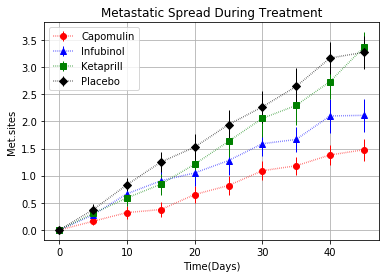

In [9]:
# Generate the Plot (with Error Bars)
x_axis=reformat_metsite_mean.index.values
err_capomulin = sem_metsite_df[sem_metsite_df['Drug'] == 'Capomulin']["Metastatic Sites"].values
err_infubinol = sem_metsite_df[sem_metsite_df['Drug'] == 'Infubinol']["Metastatic Sites"].values
err_ketapril = sem_metsite_df[sem_metsite_df['Drug'] == 'Ketapril']["Metastatic Sites"].values
err_placebo = sem_metsite_df[sem_metsite_df['Drug'] == 'Placebo']["Metastatic Sites"].values

plt.errorbar(x_axis,reformat_metsite_mean['Capomulin'],yerr=err_capomulin,fmt="or",dashes=[0.3,1],elinewidth=1,label='Capomulin')
plt.errorbar(x_axis,reformat_metsite_mean['Infubinol'],yerr=err_infubinol,fmt="b^",dashes=[0.3,1],elinewidth=1,label='Infubinol')
plt.errorbar(x_axis,reformat_metsite_mean['Ketapril'],yerr=err_ketapril,fmt="gs",dashes=[0.3,1],elinewidth=1,label='Ketaprill')
plt.errorbar(x_axis,reformat_metsite_mean['Placebo'],yerr=err_placebo,fmt="kD",dashes=[0.3,1],elinewidth=1,label='Placebo')

plt.xlabel("Time(Days)")
plt.ylabel("Met.sites")
plt.title("Metastatic Spread During Treatment")

plt.grid()
plt.legend()
# Show the Figure

# Save the Figure
plt.savefig("Metastatic_Spread_During_Treatment.png")

plt.show()

## Survival Rates

In [10]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_count =merge_data.groupby(["Drug","Timepoint"])["Mouse ID"].count()
# Convert to DataFrame
mouse_count_df = pd.DataFrame(mouse_count).reset_index()
# Preview DataFrame
mouse_count_df.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [11]:
type(mouse_count_df)

pandas.core.frame.DataFrame

In [12]:
# Minor Data Munging to Re-Format the Data Frames
reformat_mouse_count= mouse_count_df.pivot(index='Timepoint', columns='Drug', values="Mouse ID")
# Preview the Data Frame
reformat_mouse_count.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [13]:
survival_rate=mouse_count/mouse_count[:,0]*100
survival_rate_df=pd.DataFrame(survival_rate).reset_index()

reformat_survival_rate= survival_rate_df.pivot(index='Timepoint', columns='Drug', values="Mouse ID")
reformat_survival_rate

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,100.000000,100.0,100.000000,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,96.153846,100.0,96.153846,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,88.461538,96.0,88.461538,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,65.384615,96.0,88.461538,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,65.384615,92.0,80.769231,68.0
25,88.0,72.0,72.0,76.0,72.0,68.0,53.846154,92.0,73.076923,64.0
30,88.0,64.0,68.0,72.0,60.0,60.0,50.000000,92.0,69.230769,60.0
35,88.0,56.0,48.0,68.0,60.0,56.0,38.461538,84.0,61.538462,56.0
40,84.0,56.0,40.0,60.0,60.0,48.0,34.615385,80.0,46.153846,56.0


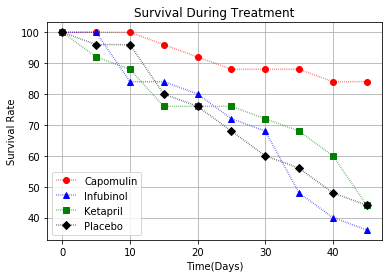

In [14]:
# Generate the Plot (with Error Bars)
x_axis= reformat_mouse_count.index.values

plt.plot(x_axis, reformat_survival_rate['Capomulin'], 'or', dashes=[0.3, 1], label='Capomulin')
plt.plot(x_axis, reformat_survival_rate['Infubinol'], 'b^', dashes=[0.3, 1], label='Infubinol')
plt.plot(x_axis, reformat_survival_rate['Ketapril'], 'gs', dashes=[0.3, 1], label='Ketapril')
plt.plot(x_axis, reformat_survival_rate['Placebo'], 'kD', dashes=[0.3, 1], label='Placebo')

plt.grid()

plt.xlabel("Time(Days)")
plt.ylabel("Survival Rate")
plt.title("Survival During Treatment")

plt.legend()

# # Save the Figure
plt.savefig('Survival Rate')

# Show the Figure
plt.show()

## Summary Bar Graph

In [15]:
# Calculate the percent changes for each drug
change_drug=reformat_mean_df.iloc[9,:]-reformat_mean_df.iloc[0,:]
percentage_change=change_drug/reformat_mean_df.iloc[0,:]*100
# Display the data to confirm
percentage_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

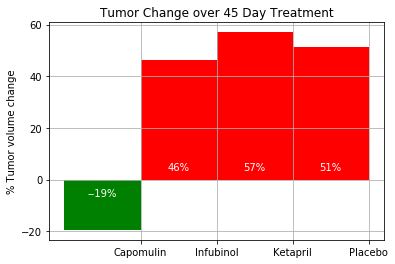

In [16]:
# Store all Relevant Percent Changes into a Tuple
relevant_percent_change = ()
for index, row in percentage_change.iteritems():
    if index in ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']:
        relevant_percent_change = relevant_percent_change + ((row, index),)
        

percentage_tuple=tuple(zip(percentage_change,percentage_change.index))

# Splice the data between passing and failing drugs
passing_drugs = []
failing_drugs = []
for t in relevant_percent_change:
    if t[0] > 0:
        failing_drugs.append(t)
    else:
        passing_drugs.append(t)

# print(passing_drugs)
# print(failing_drugs)

# Orient widths. Add labels, tick marks, etc. 
fig, ax1= plt.subplots()
x_axis = np.arange(len(relevant_percent_change))
tick_locations = [value+0.5 for value in x_axis]

ticker=[i[1] for i in relevant_percent_change ]

ax1.bar(range(1,4), [i[0] for i in failing_drugs], width = 1, color='r', alpha=1, align="center")
ax1.bar(range(0,1), [i[0] for i in passing_drugs], width = 1, color='g', alpha=1, align="center")

plt.xticks(tick_locations, ticker, rotation="horizontal")
plt.yticks(np.arange(-20, 80, 20))
plt.grid()
plt.ylabel("% Tumor volume change")
plt.title("Tumor Change over 45 Day Treatment")


# Use functions to label the percentages of changes
def round_percentage_change(percentage_changes):
    rounded_percentage = ()
    for t in percentage_changes:
        rounded_string = (str(int(round(t[0])))+'%')
        if t[0] < 0:
            rounded_string = '-' + rounded_string
        rounded_percentage = rounded_percentage + ((rounded_string, t[1], t[0]),)
    return rounded_percentage


def label_percentage(ax, percentage_changes):
    i = 0
    rounded_percentage_tuple = round_percentage_change(percentage_changes)
    for t in rounded_percentage_tuple:
        y = 3
        if t[2] < 0:
            y = -7
        ax.text(i, y, t[0], horizontalalignment='center',
                verticalalignment='bottom', color='white', weight='light', clip_on=True)
        i = i + 1

# Call functions to implement the function calls
label_percentage(ax1, relevant_percent_change)

# Save the Figure
plt.savefig('Tumer_Change_over_45_Day_Treatment.png')

# Show the Figure
fig.show()